<a href="https://colab.research.google.com/github/nidhinraj3/BikeSharingAssignment/blob/main/BikeSharingAssignmentLatest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###<font color='Navy' size='4'><b>Bike Sharing Assignment</b></font>
<font size='2'>
Assignment is to understand the factors on which the demand for shared bikes depends. 
To understand the factors affecting the demand for the shared bikes in the American market. 
</font>
<br />
<font size='2'>
The company wants to know:
</font>

- <font size='2'>Which variables are significant in predicting the demand for shared bikes.</font>
- <font size='2'>How well those variables describe the bike demands</font>

<font size='2' color='grey'>**Business Objective**</font>

<font size='2'>
Model the demand for shared bikes with the available independent variables to cater below business requirements <font>

- <font size='2'>Understand how exactly the demands vary with different features to aid in deciding business strategy to meet the demand levels and meet the customer's expectations.</font> 

- <font size='2'>Understand the demand dynamics of a new market.</font>
<br />

#####<font size='4' color='Navy'><b>Step 1. Data Understanding</b></font>

In [1567]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [1568]:
#read the dataset
bike_usage=pd.read_csv("day.csv")

In [1569]:
#check size of the dataset
bike_usage.shape

(730, 16)

<font size='2' color='purple'><b>Dataset contains 730 rows and 16 columns</b></font>

In [1570]:
#read first few records of the data
bike_usage.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1571]:
#information about the dataframe with full summary and col counts
bike_usage.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<font color='purple' size='2'>- There is no string column</font><br />
<font color='purple' size='2'>- There is 11 integer column</font><br />
<font color='purple' size='2'>- There is 4 float type column</font><br />
<font color='purple' size='2'>- There is 1 date type column</font><br />
<font color='purple' size='2'>- season,yr,month,holiday,weekday,workingday,weathersit are categorical variables stored as integer enums</font><br />

<font size='2' color='purple'><b><u>Data Dictinary for the dataset</u></b></font>
<font size='2' color='purple'>
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :   
  - <font size='2' color='purple'>1: Clear, Few clouds, Partly cloudy, Partly cloudy  </font>
  - <font size='2' color='purple'>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  </font>
  - <font size='2' color='purple'>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  </font>
  - <font size='2' color='purple'>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  </font>
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
</font>

In [1572]:
bike_usage.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<font size='2' color='purple'>- Year, Season & Month data seems to be almost equally distributed</font><br />
<font size='2' color='purple'>- 75% of data is for non holiday</font><br />
<font size='2' color='purple'>- 50% of data is for a clear day</font><br />
<font size='2' color='purple'>- 75% of data is for days with less than 26 degree temperature</font><br />

<font color='Purple' size='2'><b><u>Target Variable</u></b></font><br /><br />
<font color='Purple' size='2'>
The variable 'casual' indicates the number casual users who have made a rental.
</font><br />
<font color='Purple' size='2'>
The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day.
</font><br />
<font color='Purple' size='2'>The 'cnt' variable indicates the total number of bike rentals, including both casual and registered.</font><br />

<font color='Purple' size='2'><b>The model will be built by considering 'cnt' as the target variable.</b></font>

#####<font size='4' color='Navy'><b>Step 2. Data Cleansing</b></font>

<font color='purple' size='2'><b><u>Check for duplicates</u></b></font>

In [1573]:
df_check=bike_usage
df_check=df_check.drop_duplicates()
df_check.shape

(730, 16)

- <font color='purple' size='2'><b>Same number of rows as original , so no duplicates</b></font>

<font color='purple' size='2'><b><u>Check for missing values</u></b></font>

In [1574]:
df_check.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- <font color='purple' size='2'><b>There is no missing values in any columns</b></font>

#####<font size='4' color='Navy'><b>Step 3. Data Preparation for Analysis</b></font>

<font color='purple' size='2'><b><u>Remove columns which have similar data</u></b></font>

In [1575]:
# Data is for year 2018/2019 and this data is present in yr column
# Month information is captured in another column called month 
# Since above data is present , we can remove date column

bike_usage=bike_usage.drop(["dteday"],axis=1)

# instant column is a serial number for each record , not really related to actual data
# we can remove this column

bike_usage=bike_usage.drop(["instant"],axis=1)

#We are trying to predict count of customers who will use bike on a day based on different independednt variables
#and casual customers and registered customers are also counts of customers, this data is not available at the time of prediction 
# So we will remove this two fields
bike_usage=bike_usage.drop(["casual","registered"],axis=1)


- <font color='purple' size='2'><b>Four columns dteday,instant,casual & registered are dropped from the data based on analysis</b></font>

<font color='purple' size='2'><b><u>Substitue string values for numbers to do exploratory analysis of variables</u></b></font>

In [1576]:
bike_usage_analysis=bike_usage.copy()
bike_usage_analysis.season=bike_usage_analysis.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike_usage_analysis.yr=bike_usage_analysis.yr.map({0: "2018", 1:"2019"})
bike_usage_analysis.mnth=bike_usage_analysis.mnth.map({1: "Jan", 2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike_usage_analysis.holiday=bike_usage_analysis.holiday.map({1: "Holiday", 0:"NonHoliday"})
bike_usage_analysis.workingday=bike_usage_analysis.workingday.map({1: "Working Day", 0:"Non working day"})
bike_usage_analysis.weekday=bike_usage_analysis.weekday.map({0: "Sun", 1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
bike_usage_analysis.weathersit=bike_usage_analysis.weathersit.map({1: "Clear", 2:"mist_cloudy",3:"light_snow_rain",4:"heavy_rain"})

In [1577]:
bike_usage_analysis.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,NonHoliday,Sat,Non working day,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,NonHoliday,Sun,Non working day,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,NonHoliday,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,NonHoliday,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,NonHoliday,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,1600


#####<font size='4' color='Navy'><b>Step 4. Exploratory Data Analysis</b></font>

<font color='purple' size='2'><b><u>Analyzing Season Variable on a year basis</u></b></font>

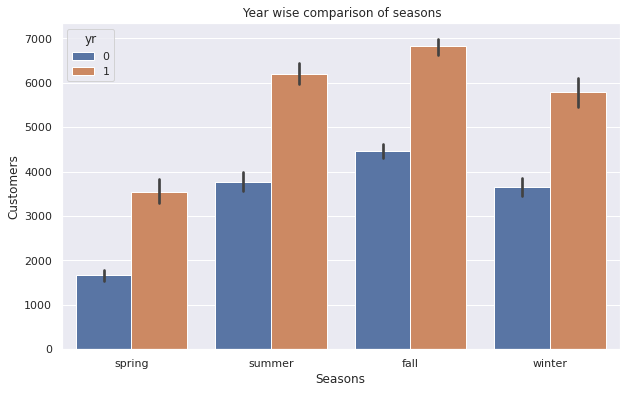

In [1578]:
plt.figure(figsize=(10,6))
sns.barplot(x=bike_usage_analysis.season,y=bike_usage.cnt,hue=bike_usage.yr)
plt.title(" Year wise comparison of seasons")
plt.xlabel("Seasons")
plt.ylabel("Customers")
plt.show()

- <font color='purple' size='2'><b>There is a good increase of usage in 2019 which is avery good positive trend for business</b></font><br />
- <font color='purple' size='2'><b>From a quick look its obvious that more usage is during fall season</b></font><br />
- <font color='purple' size='2'><b>Outliers of data seems to be very less</b></font><br />

<font color='purple' size='2'><b><u>Analyzing Month Variable on Year basis</u></b></font>

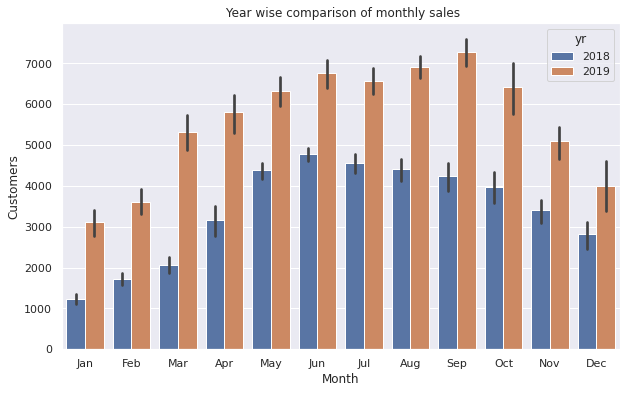

In [1579]:
plt.figure(figsize=(10,6))
sns.barplot(x=bike_usage_analysis.mnth,y=bike_usage_analysis.cnt,hue=bike_usage_analysis.yr)
plt.title(" Year wise comparison of monthly sales")
plt.xlabel("Month")
plt.ylabel("Customers")
plt.show()

- <font color='purple' size='2'><b>Highest usage is noted in September</b></font><br />
- <font color='purple' size='2'><b>Graph shows how covid affected sales in 2018 and how it is picking up in 2019</b></font><br />

<font color='purple' size='2'><b><u>Checking Week Day Variable against Weather Situation</u></b></font>

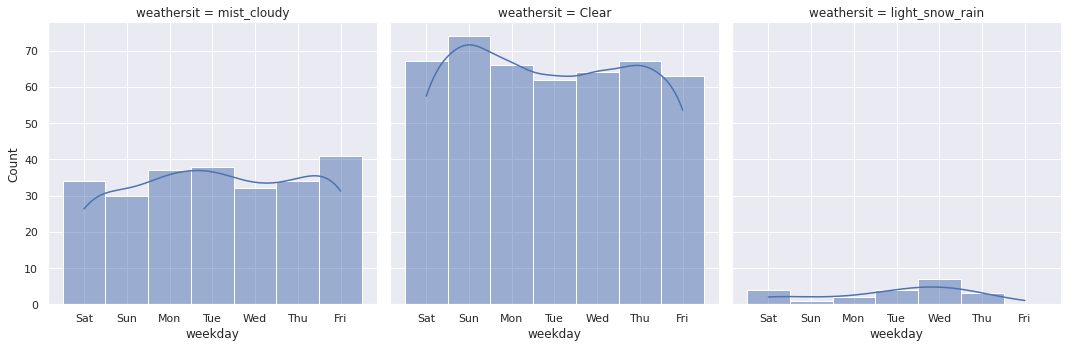

In [1580]:
sns.displot(
    bike_usage_analysis, x="weekday", col="weathersit",
    binwidth=5, height=5, facet_kws=dict(margin_titles=True),kde=True
)

- <font color='purple' size='2'><b>Above graph states that More Sales is on a clear day and rain & snow affects sales drastically where as a misty day reduce sales by half</b></font><br />
- <font color='purple' size='2'><b>On a clear day most sales is on Sunday</b></font><br />

<font color='purple' size='2'><b><u>Checking Week Day Variable</u></b></font>

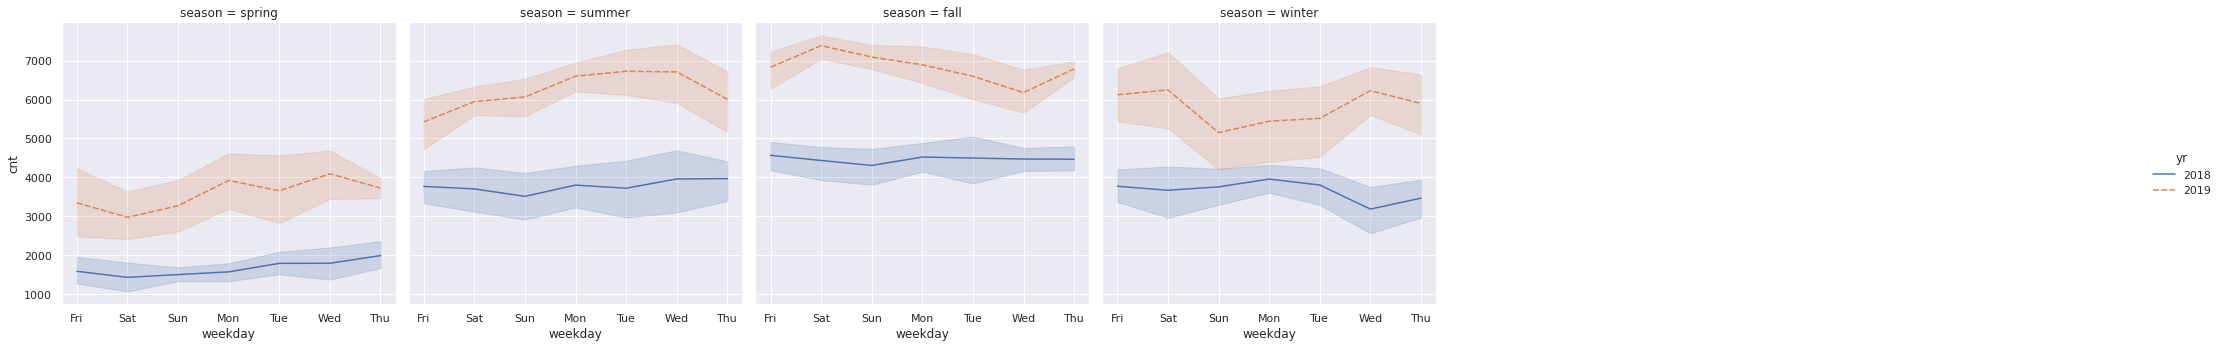

In [1581]:
sns.relplot(
    data=bike_usage_analysis, kind="line",
    x="weekday", y="cnt", hue="yr", style="yr",
    col="season", col_wrap=6
)

- <font color='purple' size='2'><b>Sales is slow during spring</b></font><br />
- <font color='purple' size='2'><b>Summer and Fall brings high sales</b></font><br />

<font color='purple' size='2'><b><u>Analyse all the numerical variables</u></b></font>

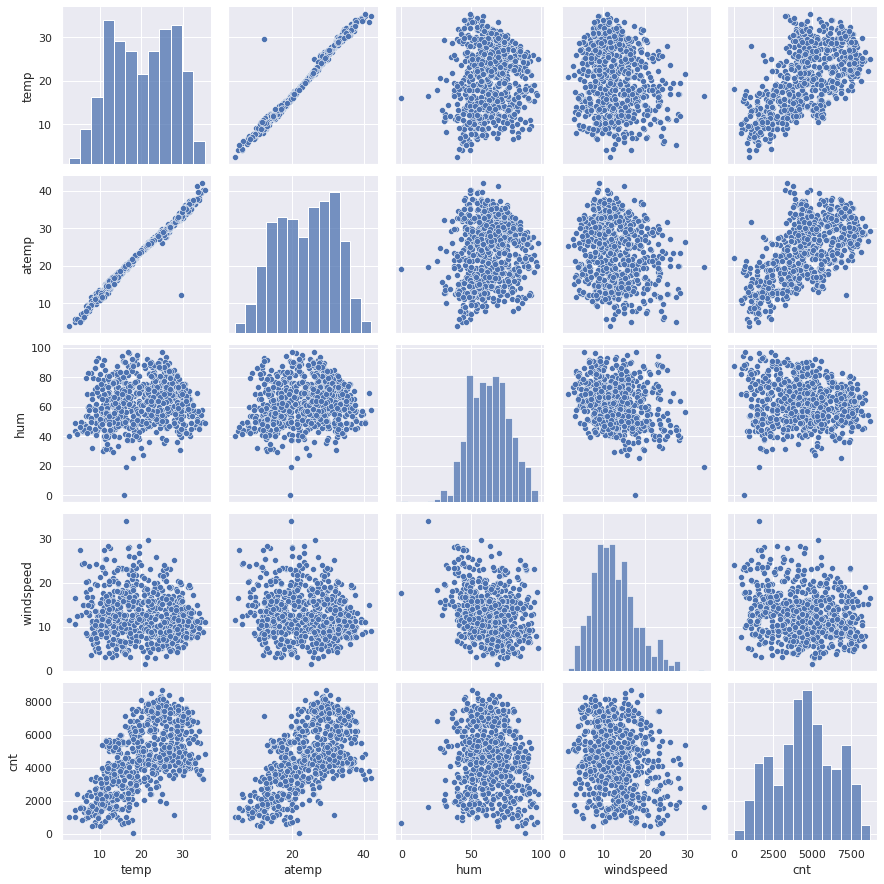

In [1582]:
sns.pairplot(bike_usage_analysis)
plt.show()

- <font color='purple' size='2'><b>In the above pairplot it is visible that there is a high correlation between "temp" and "atemp" column , the relation is very linear in nature</b></font><br />
- <font color='purple' size='2'><b>We need only one of them for modelling to avoid multicollinearity</b></font><br />

In [1583]:
bike_usage_analysis.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


- <font color='purple' size='2'><b>Correlation matrix confirms the collinearity between "temp" and "atemp" field</b></font><br />

In [1584]:
# dropping atemp column
# To reduce multicollinearity we can remove atemp column
bike_usage_analysis=bike_usage_analysis.drop(["atemp"],axis=1)
bike_usage=bike_usage.drop(["atemp"],axis=1)

<font color='purple' size='2'><b><u>Analyse all the categorical variables</u></b></font>

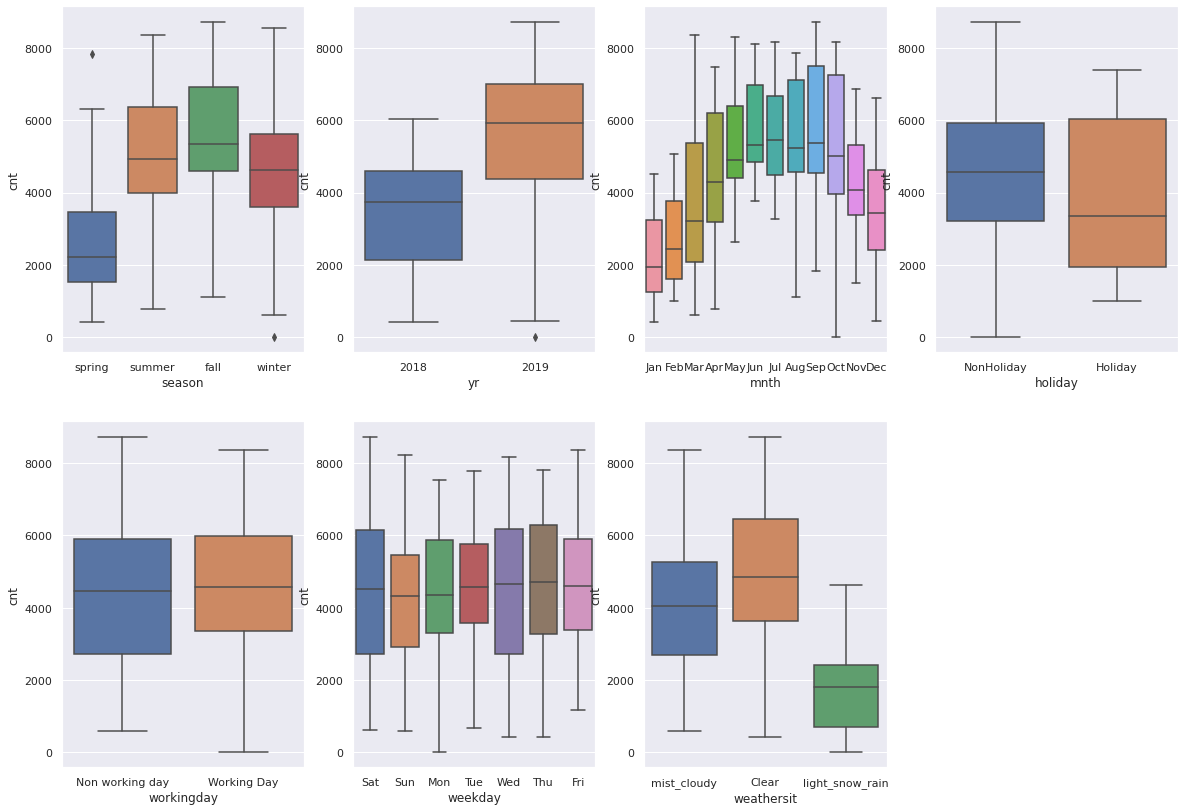

In [1585]:
plt.figure(figsize=(20, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_usage_analysis)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_usage_analysis)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_usage_analysis)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_usage_analysis)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_usage_analysis)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_usage_analysis)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_usage_analysis)
plt.show()

- <font color='purple' size='2'><b>Other than previous observations we notice that "working day" and "holiday" are showing same patterns and we need to include only one of them in the model analysis</b></font><br />

In [1586]:
#Dropping working day column as relevant information is present in holiday field
bike_usage_analysis=bike_usage_analysis.drop(["workingday"],axis=1)
bike_usage=bike_usage.drop(["workingday"],axis=1)

#####<font size='4' color='Navy'><b>Step 5. Data Preparation for Modelling</b></font>

<font color='purple' size='2'><b><u>Dummy Variables or One Hot Encoding</u></b></font>

<font color='purple' size='2'>Converting categorical variable values in columns with integer values</font>

In [1587]:
weathersit_data = pd.get_dummies(bike_usage_analysis['weathersit'], drop_first = True)
bike_usage = pd.concat([bike_usage, weathersit_data], axis = 1)

season_data = pd.get_dummies(bike_usage_analysis['season'], drop_first = True)
bike_usage = pd.concat([bike_usage, season_data], axis = 1)

weekday_data = pd.get_dummies(bike_usage_analysis['weekday'], drop_first = True)
bike_usage = pd.concat([bike_usage, weekday_data], axis = 1)

mnth_data = pd.get_dummies(bike_usage_analysis['mnth'], drop_first = True)
bike_usage = pd.concat([bike_usage, mnth_data], axis = 1)

bike_usage=bike_usage.drop(["weathersit","season","weekday","mnth"],axis=1)
bike_usage.head()

,yr,holiday,temp,hum,windspeed,cnt,light_snow_rain,mist_cloudy,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,14.110847,80.5833,10.749882,985,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,8.050924,43.7273,16.636703,1349,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,8.200000,59.0435,10.739832,1562,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,9.305237,43.6957,12.522300,1600,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#####<font size='4' color='Navy'><b>Step 6: Splitting the Data into Training and Testing Sets</font>


<font color='purple' size='2'><b><u>Split Dataset</u></b></font>

In [1588]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_usage, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(219, 28)


<font color='purple' size='2'><b><u>Rescaling features</u></b></font>

<font color='purple' size='2'>Rescaling the variables so that they have a comparable scale. Otherwise some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. </font>

<font color='purple' size='2'>We are using MinMax Scaling for this</font>

In [1589]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Appling scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,light_snow_rain,mist_cloudy,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0.204096,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1590]:
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,light_snow_rain,mist_cloudy,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font color='purple' size='2'><b><u>Checking correlation</u></b></font>

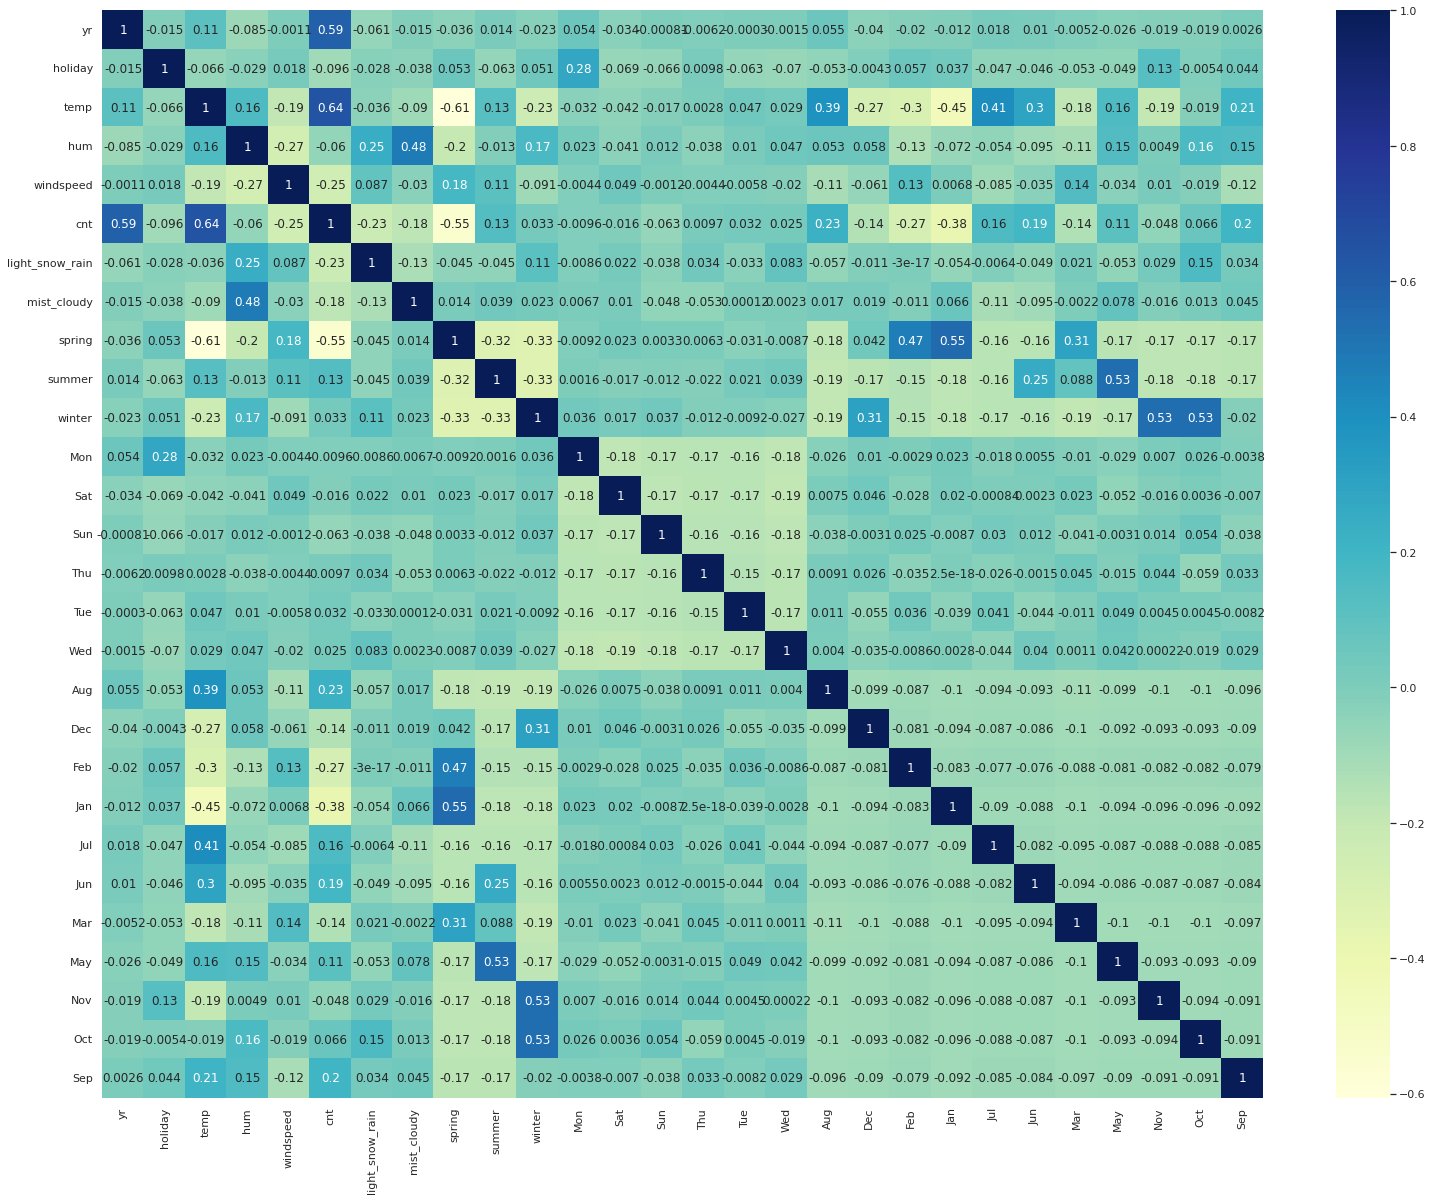

In [1591]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- <font color='purple' size='2'><b>Not very high correlations are visible</b></font><br />

#####<font size='4' color='Navy'><b>Step 7: Building a Linear Model with Adding All Variables and Dropping </font>

<font color='purple' size='2'><b><u>Fit the model with all variables</u></b></font>

In [1592]:
import statsmodels.api as sm

#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const              0.341968
yr                 0.232116
holiday           -0.086925
temp               0.450562
hum               -0.151340
windspeed         -0.186453
light_snow_rain   -0.257443
mist_cloudy       -0.061066
spring            -0.048159
summer             0.038725
winter             0.105847
Mon               -0.020907
Sat               -0.000495
Sun               -0.055031
Thu               -0.009237
Tue               -0.018890
Wed               -0.005388
Aug                0.014404
Dec               -0.045586
Feb               -0.032282
Jan               -0.062777
Jul               -0.040350
Jun               -0.002972
Mar                0.001045
May                0.023940
Nov               -0.041851
Oct                0.007534
Sep                0.081060
dtype: float64

In [1593]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.74e-182
Time:                        06:14:24   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3420      0.044      7.767      0.000       0.255       0.428
yr                  0.2321      0.008     28.820      0.000       0.216       0.248
holiday            -0.0869      0.027     -3.269      0.001      -0.139      -0.035
temp                0.4506      0.046      9.734      0.000       0.360       0.542
hum                -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed          -0.1865      0.026     -7.257      0.000      -0.237      -0.136
light_snow_rain    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
mist_cloudy        -0.0611      0.010     -5.854      0.000      -0.082      -0.041
spring             -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer              0.0387      0.026      1.478      0.140      -0.013       0.090
winter              0.1058      0.028      3.794      0.000       0.051       0.161
Mon                -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat                -0.0005      0.015     -0.033      0.974      -0.030       0.029
Sun                -0.0550      0.015     -3.607      0.000      -0.085      -0.025
Thu                -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tue                -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed                -0.0054      0.015     -0.362      0.718      -0.035       0.024
Aug                 0.0144      0.034      0.428      0.669      -0.052       0.081
Dec                -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb                -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan                -0.0628      0.034     -1.873      0.062      -0.129       0.003
Jul                -0.0404      0.035     -1.151      0.250      -0.109       0.029
Jun                -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar                 0.0010      0.025      0.043      0.966      -0.047       0.049
May                 0.0239      0.021      1.140      0.255      -0.017       0.065
Nov                -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct                 0.0075      0.036      0.211      0.833      -0.063       0.078
Sep                 0.0811      0.032      2.533      0.012       0.018       0.144
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                         35.2
==============================================================================

Note

<font color='purple' size='2'><b><u>Checking VIF</u></b></font>

In [1594]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,38.19
2,temp,37.11
7,spring,11.81
9,winter,11.77
8,summer,6.89
25,Oct,6.40
24,Nov,6.12
16,Aug,5.87
20,Jul,5.26
19,Jan,5.22


- <font color='purple' size='2'><b>Humidity shows very high VIF value</b></font><br />

<font color='purple' size='2'><b><u>Dropping "Sat" from the dataset with high p value and highest of VIF</u></b></font>

In [1595]:
X = X_train.drop('Sat', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 2</u></b></font>

In [1596]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          8.32e-183
Time:                        06:14:24   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3417      0.043     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1597]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,38.01
2,temp,36.98
9,winter,11.69
7,spring,11.66
8,summer,6.66
24,Oct,6.37
23,Nov,6.07
15,Aug,5.79
19,Jul,5.20
18,Jan,5.18


<font color='purple' size='2'><b><u>Dropping "Mar" from the dataset with high p value and VIF</u></b></font>

In [1598]:
X = X.drop('Mar', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 3</u></b></font>

In [1599]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          7.77e-184
Time:                        06:14:24   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3424      0.040     

<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1600]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,36.98
3,hum,36.00
9,winter,10.53
7,spring,8.01
8,summer,6.65
15,Aug,5.52
23,Oct,5.07
4,windspeed,5.02
19,Jul,5.01
22,Nov,4.85


<font color='purple' size='2'><b><u>Dropping "Jun" from the dataset with high p value</u></b></font>

In [1601]:
X = X.drop('Jun', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 4</u></b></font>

In [1602]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          7.15e-185
Time:                        06:14:24   Log-Likelihood:                 527.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -900.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3418      0.040     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1603]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,35.81
2,temp,21.52
9,winter,10.26
7,spring,7.17
8,summer,6.23
4,windspeed,5.00
22,Oct,4.79
21,Nov,4.77
15,Aug,3.34
16,Dec,3.32


<font color='purple' size='2'><b><u>Dropping "Oct" from the dataset with high p value and VIF</u></b></font>

In [1604]:
X = X.drop('Oct', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 5</u></b></font>

In [1605]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.60e-186
Time:                        06:14:25   Log-Likelihood:                 527.91
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     486   BIC:                            -906.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3437      0.040     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1606]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.21
2,temp,21.51
7,spring,7.16
9,winter,5.85
8,summer,5.67
4,windspeed,4.91
15,Aug,3.10
19,Jul,2.78
18,Jan,2.41
6,mist_cloudy,2.37


<font color='purple' size='2'><b><u>Dropping "Wed" from the dataset with high p value and VIF</u></b></font>

In [1607]:
X = X.drop('Wed', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 6</u></b></font>

In [1608]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.27e-187
Time:                        06:14:25   Log-Likelihood:                 527.81
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     487   BIC:                            -912.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3424      0.039     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1609]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.96
2,temp,21.29
7,spring,7.13
9,winter,5.85
8,summer,5.65
4,windspeed,4.91
14,Aug,3.10
18,Jul,2.77
17,Jan,2.41
6,mist_cloudy,2.36


<font color='purple' size='2'><b><u>Dropping "Thu" from the dataset with high p value and VIF</u></b></font>

In [1610]:
X = X.drop('Thu', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 7</u></b></font>

In [1611]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     135.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.27e-188
Time:                        06:14:25   Log-Likelihood:                 527.64
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     488   BIC:                            -918.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3404      0.039     

<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1612]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.91
2,temp,21.18
7,spring,7.11
9,winter,5.85
8,summer,5.64
4,windspeed,4.91
13,Aug,3.10
17,Jul,2.77
16,Jan,2.40
6,mist_cloudy,2.35


<font color='purple' size='2'><b><u>Dropping "Aug" from the dataset with high p value and VIF</u></b></font>

In [1613]:
X = X.drop('Aug', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 8</u></b></font>

In [1614]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.40e-189
Time:                        06:14:25   Log-Likelihood:                 527.42
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     489   BIC:                            -923.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3490      0.037     

<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1615]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.23
2,temp,18.42
7,spring,5.45
4,windspeed,4.84
9,winter,4.08
8,summer,3.34
15,Jan,2.38
6,mist_cloudy,2.35
0,yr,2.11
14,Feb,1.93


<font color='purple' size='2'><b><u>Dropping "Tue" from the dataset with high p value and VIF</u></b></font>

In [1616]:
X = X.drop('Tue', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 9</u></b></font>

In [1617]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.13e-189
Time:                        06:14:25   Log-Likelihood:                 526.60
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     490   BIC:                            -928.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3473      0.037     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1618]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.09
2,temp,18.41
7,spring,5.45
4,windspeed,4.83
9,winter,4.07
8,summer,3.34
14,Jan,2.38
6,mist_cloudy,2.35
0,yr,2.11
13,Feb,1.92


<font color='purple' size='2'><b><u>Dropping "Mon" from the dataset with high p value and VIF</u></b></font>

In [1619]:
X = X.drop('Mon', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 10</u></b></font>

In [1620]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.96e-190
Time:                        06:14:26   Log-Likelihood:                 525.77
No. Observations:                 510   AIC:                            -1014.
Df Residuals:                     491   BIC:                            -933.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3452      0.037     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1621]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.86
2,temp,18.40
7,spring,5.45
4,windspeed,4.83
9,winter,4.07
8,summer,3.34
13,Jan,2.38
6,mist_cloudy,2.34
0,yr,2.10
12,Feb,1.92


<font color='purple' size='2'><b><u>Dropping "Mon" from the dataset with high p value and VIF</u></b></font>

In [1622]:
X = X.drop('May', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 11</u></b></font>

In [1623]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          4.04e-191
Time:                        06:14:26   Log-Likelihood:                 524.74
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     492   BIC:                            -937.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3343      0.036     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1624]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.84
2,temp,18.35
7,spring,5.45
4,windspeed,4.74
9,winter,4.07
8,summer,2.81
13,Jan,2.38
6,mist_cloudy,2.34
0,yr,2.09
12,Feb,1.92


<font color='purple' size='2'><b><u>Dropping "Feb" from the dataset with high p value and VIF</u></b></font>

In [1625]:
X = X.drop('Feb', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 12</u></b></font>

In [1626]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.5
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.11e-191
Time:                        06:14:26   Log-Likelihood:                 523.38
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     493   BIC:                            -940.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3231      0.035     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1627]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.22
2,temp,17.81
4,windspeed,4.72
7,spring,4.37
9,winter,4.07
8,summer,2.81
6,mist_cloudy,2.34
0,yr,2.09
14,Nov,1.83
12,Jan,1.75


<font color='purple' size='2'><b><u>Dropping "Nov" from the dataset with high p value and VIF</u></b></font>

In [1628]:
X = X.drop('Nov', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 12</u></b></font>

In [1629]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.08e-191
Time:                        06:14:26   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3055      0.035     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1630]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.65
2,temp,17.39
4,windspeed,4.66
7,spring,4.35
9,winter,3.45
8,summer,2.79
6,mist_cloudy,2.32
0,yr,2.09
12,Jan,1.73
13,Jul,1.60


<font color='purple' size='2'><b><u>Dropping "Dec" from the dataset with high p value and VIF</u></b></font>

In [1631]:
X = X.drop('Dec', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 13</u></b></font>

In [1632]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.45e-192
Time:                        06:14:26   Log-Likelihood:                 519.45
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     495   BIC:                            -945.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2972      0.034     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1633]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.28
2,temp,16.71
4,windspeed,4.66
7,spring,4.34
9,winter,3.38
8,summer,2.78
6,mist_cloudy,2.30
0,yr,2.09
11,Jan,1.67
12,Jul,1.59


<font color='purple' size='2'><b><u>Dropping "Jan" from the dataset with high p value and VIF</u></b></font>

In [1634]:
X = X.drop('Jan', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 14</u></b></font>

In [1635]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.13e-192
Time:                        06:14:26   Log-Likelihood:                 517.45
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2852      0.034     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1636]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.28
2,temp,16.03
4,windspeed,4.65
7,spring,4.01
9,winter,3.35
8,summer,2.78
6,mist_cloudy,2.30
0,yr,2.08
11,Jul,1.59
12,Sep,1.39


<font color='purple' size='2'><b><u>Dropping "hum" from the dataset with high p value and VIF</u></b></font>

In [1637]:
X = X.drop('hum', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 15</u></b></font>

In [1638]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.45e-190
Time:                        06:14:26   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2063      0.029     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1639]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
7,summer,2.22
6,spring,2.11
0,yr,2.07
8,winter,1.82
10,Jul,1.59
5,mist_cloudy,1.55
11,Sep,1.34
9,Sun,1.18


<font color='purple' size='2'><b><u>Dropping "summer" from the dataset with high p value and VIF</u></b></font>

<font color='Purple' size='2'>Since summer and winter showed almost similar numbers during EDA lets drop one of them</font>

In [1640]:
X = X.drop('summer', 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


<font color='purple' size='2'><b><u>Fit the model - Run 16</u></b></font>

In [1641]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          4.60e-189
Time:                        06:14:27   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     498   BIC:                            -931.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2597      0.024     

<font color='purple' size='2'><b><u>Check VIF after Dropping</u></b></font>

In [1642]:
#Check VIF after dropping
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.01
0,yr,2.06
6,spring,1.66
5,mist_cloudy,1.52
7,winter,1.41
9,Jul,1.35
10,Sep,1.20
8,Sun,1.18
4,light_snow_rain,1.08


- <font color='purple' size='2'><b>P Values and VIF are now in acceptable range , we can use this to predict our model</b></font><br />

#####<font size='4' color='Navy'><b>Step 7: Residual Analysis of the train data</b></font>

<font color='purple' size='2'><b><u>Check whether error terms are normally distributed</u></b></font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

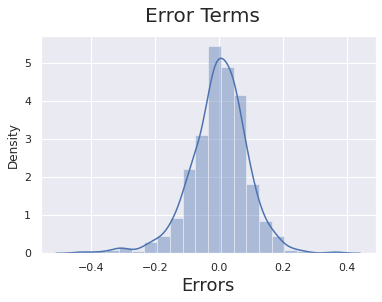

In [1643]:
y_train_cnt = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

- <font color='purple' size='2'><b>Error terms are normally distributed , so linear regression assumption on error terms is correct</b></font><br />

#####<font size='4' color='Navy'><b>Step 8: Making Predictions Using the Final Model</b></font>

<font color='purple' size='2'><b><u>Applying the scaling on the test sets</u></b></font>

In [1644]:
# Appling scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

,yr,holiday,temp,hum,windspeed,cnt,light_snow_rain,mist_cloudy,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0.837241,0.534223,0.149393,0.704300,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,0.911423,0.470417,0.231142,0.725421,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0.496221,0.777843,0.443398,0.278853,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,0.890387,0.236659,0.449707,0.545512,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.821739,0.070765,0.682387,0.569148,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


<font color='purple' size='2'><b><u>Dividing into X_test and y_test</u></b></font>

In [1645]:
y_test = df_test.pop('cnt')
X_test = df_test

<font color='purple' size='2'><b><u>Run Prediction</u></b></font>

In [1646]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_new = X_test_m4[X_train_lm.columns]
X_test_new.head()

y_pred_m4 = lr_2.predict(X_test_new)
y_pred_m4


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


184    0.356077
535    0.871713
299    0.387488
221    0.597746
152    0.534371
         ...   
400    0.299590
702    0.716383
127    0.451659
640    0.779928
72     0.245837
Length: 219, dtype: float64

#####<font size='4' color='Navy'><b>Step 9: Model Evaluation
</b></font>

<font color='purple' size='2'><b><u>Check R2 score</u></b></font>

In [1647]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_m4)

0.7981874120370567

- <font color='purple' size='2'><b>R2 value 0.7981 is very near to R2 value in trained set which is 0.837</b></font><br />

<font color='purple' size='2'><b><u>Plotting the spread</u></b></font>

Text(0, 0.5, 'y_pred')

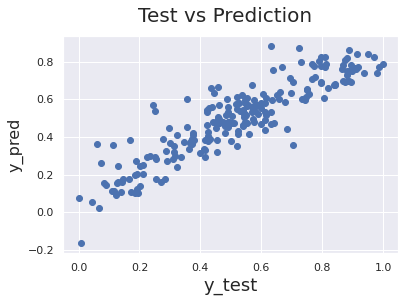

In [1648]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('Test vs Prediction', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


- <font color='purple' size='2'><b>We can see that the equation of our best fitted line is:</b></font><br />
><font color='purple' size='3'>`cnt = 0.2597 +0.2340 ×yr-0.1062×holiday+0.4502×temp-0.1396×windspeed-0.2916×light_snow_rain-0.0831×misty_cloudy-0.1102×spring+0.0494×winter-0.0479xSun-0.0704xJul+0.0893xSep`</font>

- <font color='purple' size='2'><b>Increase in temperature by a degree causes an increase in bike users by 0.45</b></font><br />
- <font color='purple' size='2'><b>A chance of light snow or rain reduces number of customers by 0.2916</b></font><br />
- <font color='purple' size='2'><b>A misty or cloudy day reduces number of customers by 0.083</b></font><br />
- <font color='purple' size='2'><b>On a holiday the number of customers gets reduced by 0.1062</b></font><br />
- <font color='purple' size='2'><b>If there is an increase in windspeed by one knot it reduces the customer by 0.1396</b></font><br />
- <font color='purple' size='2'><b>During swinter comparatively number of users are increased 0.0494  at the same time spring causes a reduction in the customers by 0.011</b></font><br />
- <font color='purple' size='2'><b>On Sundays customers are less by around 0.0479</b></font><br />

#####<font size='4' color='Navy'><b>Step 10: Model Validation using RFE
</b></font>

<font color='purple' size='2'><b><u>Running RFE with the output number of the variable equal to 11</u></b></font>

In [1649]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=11)   
rfe = rfe.fit(X_train, y_train)

In [1650]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('light_snow_rain', True, 1),
 ('mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Mon', False, 10),
 ('Sat', False, 17),
 ('Sun', False, 3),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 14),
 ('Aug', False, 9),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 16),
 ('May', False, 8),
 ('Nov', False, 5),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [1651]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'light_snow_rain',
       'mist_cloudy', 'spring', 'winter', 'Jul', 'Sep'],
      dtype='object')

<font color='purple' size='2'><b><u>Building model using statsmodel, for the detailed statistics</u></b></font>

In [1652]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.87e-189
Time:                        06:14:28   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3372      0.031     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1653]:
vif = pd.DataFrame()
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.37
2,temp,15.27
4,windspeed,4.02
7,spring,2.54
6,mist_cloudy,2.23
8,winter,2.09
0,yr,2.06
9,Jul,1.40
5,light_snow_rain,1.21
10,Sep,1.20


<font color='purple' size='2'><b><u>Dropping "hum" due to high VIF</u></b></font>

In [1654]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [1655]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.16e-186
Time:                        06:14:28   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.024     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<font color='purple' size='2'><b><u>Checking VIF after dropping</u></b></font>

In [1656]:
vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
6,spring,1.65
5,mist_cloudy,1.51
7,winter,1.40
8,Jul,1.35
9,Sep,1.20
4,light_snow_rain,1.08
1,holiday,1.04


<font color='purple' size='2'><b><u>Run Prediction</u></b></font>

In [1657]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_new = X_test_m4[X_train_rfe.columns]
X_test_new.head()

y_pred_m4 = lm.predict(X_test_new)
y_pred_m4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


184    0.356581
535    0.865140
299    0.380071
221    0.590993
152    0.527469
         ...   
400    0.341321
702    0.707149
127    0.492441
640    0.773016
72     0.237794
Length: 219, dtype: float64

<font color='purple' size='2'><b><u>Checking R2 Score</u></b></font>

In [1658]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_m4)

0.795377785692188

- <font color='purple' size='2'><b>R2 value 0.7953 is very near to R2 value in trained set which is 0.833</b></font><br />

<font color='purple' size='2'><b><u>Plotting the spread</u></b></font>

Text(0, 0.5, 'y_pred')

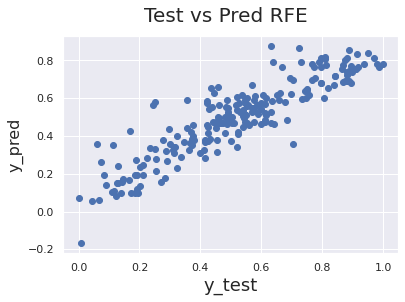

In [1660]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m4)
fig.suptitle('Test vs Pred RFE', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

<font color='purple' size='2'><b><u>Comparison between Manual prediction and Automated RFE Model</u></b></font>

Variable Name | Coefficent (RFE) | Coefficient(Manual) 
--- | --- | --- 
yr                  |0.2341|0.2340|     
holiday            |-0.0986|-0.1062|      
temp                |0.4515|0.4502|      
windspeed          |-0.1398|-0.1396|      
light_snow_rain    |-0.2864|-0.2916|      
mist_cloudy        |-0.0811|-0.0831|      
spring             |-0.1108|-0.1102|      
winter              |0.0473|0.0494|      
Jul                |-0.0727|-0.0704|      
Sep                 |0.0577|0.0564|

   

<font color='Purple' size='2'>R2 RFE    : Predicted: 0.7953  , Actual: 0.833</font><br />
<font color='Purple' size='2'>R2 Manual : Predicted: 0.7981  , Actual: 0.837</font>

- <font size='2' color='purple'><b>The values using manual prediction and RFE modelling are almost same</b></font>

#####<font size='4' color='Navy'><b>Step 11: Summary
</b></font>

<font color='Purple' size='3'><b>Temperature of a day and the weather conditions are the main factor affecting the number of customers,</b></font>
<font color='Purple' size='3'><em>Providing discount vouchers for cold drinks on a hotter day may be good option</em></font>

 <font color='Purple' size='3'><b>Seasons also affect the commuters choice in riding the bike</b></font><br />
<font color='Purple' size='3'><em>Seasonal discounts to attract customers during spring is an option to discuss</em></font> <br />

> <font color='Purple' size='3'>Detailed figures are given below based on manual prediction</font>


- <font color='purple' size='2'><b>Increase in temperature by a degree causes an increase in bike users by 0.45</b></font><br />
- <font color='purple' size='2'><b>A chance of light snow or rain reduces number of customers by 0.2916</b></font><br />
- <font color='purple' size='2'><b>A misty or cloudy day reduces number of customers by 0.083</b></font><br />
- <font color='purple' size='2'><b>On a holiday the number of customers gets reduced by 0.1062</b></font><br />
- <font color='purple' size='2'><b>If there is an increase in windspeed by one knot it reduces the customer by 0.1396</b></font><br />
- <font color='purple' size='2'><b>During swinter comparatively number of users are increased 0.0494  at the same time spring causes a reduction in the customers by 0.011</b></font><br />
- <font color='purple' size='2'><b>On Sundays customers are less by around 0.0479</b></font><br />